In [12]:
import numpy as np # کار کردن با ماتریس
from gym import Env
from gym.spaces import Box , Discrete # دیسکریت برای اکشن اسپیس و باکس برای استیتها
import random
import pandas as pd
import math
from datetime import datetime
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

In [21]:
# dataF = pd.read_excel('Book3.xlsx')
data_test = pd.read_excel('train_database.xlsx')

In [22]:
class CustomEnv(Env):

    def __init__(self): # برای مقداردهی اولیه
        
        self.action_space = Discrete(3) # 3 تا عمل داریم
        # T1(0)  T2(1)  T3(2)
        self.observation_space = Discrete(20)


In [23]:
env = CustomEnv()

In [24]:
# برای تعیین سطح دانش اموز
# مرحله ترین
# def determining_studen_level(student_number):
    
#     timee = dataF.at[student_number , 'time_in_min']
#     # -----------------------------------------------------------
#     commands = dataF.at[student_number , 'num_commands']
#     solution_display = dataF.at[student_number , 'solution_displ']
#     submit = dataF.at[student_number , 'num_submitted_answers']
#     answer =  dataF.at[student_number , 'answer']
#     complete = completed_in_time = dataF.at[student_number , 'completed_in_time']
    
#     studen_level = (commands + complete + answer ) / timee

#     if solution_display == 0:
#         studen_level = int((studen_level * 0.75) + 1)
#         if studen_level > 4:
#             studen_level = 4
#             return studen_level
#         else:
#             return studen_level

#     elif solution_display == 1:
#         studen_level = int((studen_level * 1) + 1)
#         if studen_level > 4:
#             studen_level = 4
#             return studen_level
#         else:
#             return studen_level


In [25]:
def determining_studen_level_test(student_number):
    
    timee = data_test.at[student_number , 'time_in_min']
    # -----------------------------------------------------------
    commands = data_test.at[student_number , 'num_commands']
    solution_display = data_test.at[student_number , 'solution_displ']
    submit = data_test.at[student_number , 'num_submitted_answers']
    answer =  data_test.at[student_number , 'answer']
    complete = completed_in_time = data_test.at[student_number , 'completed_in_time']
    
    studen_level = (commands + complete + answer ) / timee

    if solution_display == 0:
        studen_level = int((studen_level * 0.75) + 1)
        if studen_level > 4:
            studen_level = 4
            return studen_level
        else:
            return studen_level

    elif solution_display == 1:
        studen_level = int((studen_level * 1) + 1)
        if studen_level > 4:
            studen_level = 4
            return studen_level
        else:
            return studen_level


In [26]:
# تعریف متغیرها
student_number = 0

# برای یادگیری
total_epochs = 0
episodes = 20000

# تعریف پارامترهای الگوریتم
alpha = 0.45 # learning rate
gamma = 0.6 # discount factor
epsilon = 0.1 # exploration rate
epsilon_decay = 0.995
Q_values_per_episode = []
Q = np.zeros([20, 3])
Q

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

total_epochs: 779623
episodes: 20000
Average timesteps taken: 38.98115
epsilon: 2.8947756746417183e-45 

Q-table after train with databese:

 [[37.5        22.47588024 23.15065645]
 [37.5        19.81928557 19.33128177]
 [37.5        21.82494039 22.98296701]
 [37.5        19.17783068 16.17658311]
 [37.5        21.52459334 16.88610381]
 [37.5        22.93383961 23.10495002]
 [22.70373911 37.5        22.32761995]
 [37.5        20.72013786 22.84307261]
 [19.24629249 37.5        22.68463485]
 [37.5        22.80976028 22.91648494]
 [37.5        22.91394606 19.24302378]
 [37.5        23.08469874 16.79419141]
 [37.5        23.11561128 20.79619198]
 [37.5        20.82244372 21.98772941]
 [37.5        22.47306117 20.48953799]
 [37.5        10.44       23.10306589]
 [37.5        21.0718699  23.06184944]
 [37.5        21.95130137 22.00725425]
 [37.5        22.95710126 22.53661682]
 [37.5        22.30599751 23.07982036]]


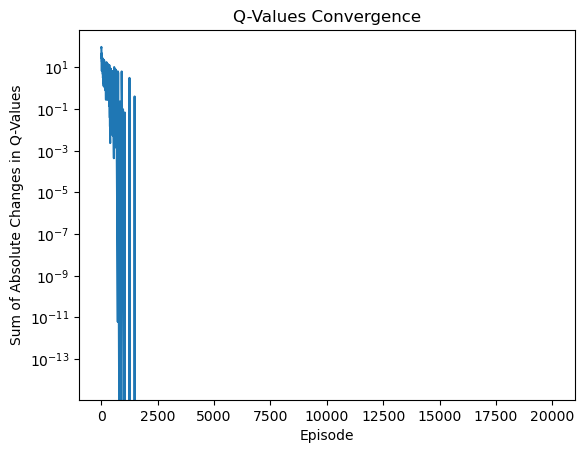

In [27]:
for episode in range(0 , episodes):
    epochs = 0 # tedad marahel- hamoon count dar marhale ghabli
    state = 0
    epsilon = epsilon * epsilon_decay #decay step
    
    
    while state != 20:

        if np.random.rand() < epsilon:
            #exploration option
            reward = 0.7
            action = env.action_space.sample()
            if state != 19:
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[state+1]) - Q[state, action])
                epochs += 1
            elif state == 19:
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[state]) - Q[state, action])
                epochs += 1
            
        else:
            #exploitation option
            action = np.argmax(Q[state])
            reward = 15
            if state != 19:
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[state+1]) - Q[state, action])
                epochs += 1
            elif state == 19:
                Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[state]) - Q[state, action])
            epochs += 1

        state += 1
        
    total_epochs += epochs
    # ذخیره Q-table در هر اپیزود
    Q_values_per_episode.append(Q.copy())

# محاسبه تغییرات در مقادیر Q-table
Q_deltas = []

for i in range(1, episodes):
    Q_delta = np.sum(np.abs(Q_values_per_episode[i] - Q_values_per_episode[i - 1]))
    Q_deltas.append(Q_delta)


print("total_epochs: {}".format(total_epochs))
print("episodes: {}".format(episodes))
print("Average timesteps taken: {}".format(total_epochs/episodes))
print("epsilon: {} \n".format(float(epsilon)))
print(f'Q-table after train with databese:\n\n {Q}')


# رسم نمودار همگرایی
plt.plot(Q_deltas)
plt.xlabel('Episode')
plt.ylabel('Sum of Absolute Changes in Q-Values')
plt.title('Q-Values Convergence')
plt.yscale('log')
plt.show()


# gamma ==0.2,0.1,1 ---> table: float


In [28]:
# ارزیابی کلی برنامه
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

test_user_number = 120
y_true = []
y_pred = []

for i in range(test_user_number):
    dsl = determining_studen_level_test(i)
    finding_phase = data_test.at[i, 'phase']
    task = data_test.at[i, 'task_variant']
    
    for phase in range(5):
        if finding_phase == phase + 1:
            for level in range(4):
                if dsl == level + 1:
                    state = 4 * phase + level
                    action = np.argmax(Q[state])
                    y_true.append(task)
                    y_pred.append(action + 1)


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')


Accuracy: 80.83%
Precision: 74.52%
Recall: 80.83%
F1 Score: 77.10%


C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# برای تست برنامه
stu_num = 0
num = 0
test_user_number = 120
k = 0
percent = 0

for i in range(test_user_number):
    dsl = determining_studen_level_test(i)
    finding_phase = data_test.at[i , 'phase']
    task = data_test.at[i , 'task_variant']
    
    
    for i in range(5):
        if k == 20:
            break
        if finding_phase == i+1:
            for j in range(4):
                if dsl == j+1:
                    k = 4 * i + j
                    action = np.argmax(Q[k])
                    print(f'student = {stu_num} --- phase = {finding_phase} --- level = {dsl} --- new task = {action+1} - {task} = old task')
                    if (action+1) == task:
                        percent +=1
    
    stu_num += 1

print(f'\ncorrect : {percent} of {test_user_number} --- wrong : {test_user_number - percent} of {test_user_number}')
print (f'new / total = {(percent / test_user_number) * 100} %')

student = 0 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 1 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 2 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 3 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 4 --- phase = 1 --- level = 1 --- new task = 1 - 3 = old task
student = 5 --- phase = 1 --- level = 2 --- new task = 1 - 1 = old task
student = 6 --- phase = 1 --- level = 2 --- new task = 1 - 1 = old task
student = 7 --- phase = 1 --- level = 2 --- new task = 1 - 1 = old task
student = 8 --- phase = 1 --- level = 2 --- new task = 1 - 1 = old task
student = 9 --- phase = 1 --- level = 1 --- new task = 1 - 1 = old task
student = 10 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 11 --- phase = 1 --- level = 2 --- new task = 1 - 3 = old task
student = 12 --- phase = 1 --- level = 4 --- new task = 1 - 1 = old task
student = 13 --- phase = 1 --- level = 1 --- new task = 1 - 1

In [30]:
# best:
# gamma : 0.65
# alpha : 0.6 , 0.45

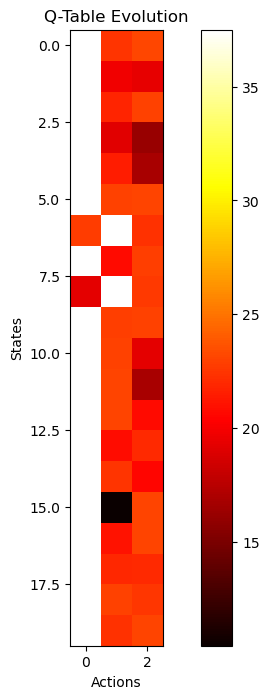

In [31]:
# نمودار تکامل جدول کیو

import matplotlib.pyplot as plt

# Q-values of each state-action pair over time
plt.figure(figsize=(10, 8))
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel('Actions')
plt.ylabel('States')
plt.title('Q-Table Evolution')
plt.show()


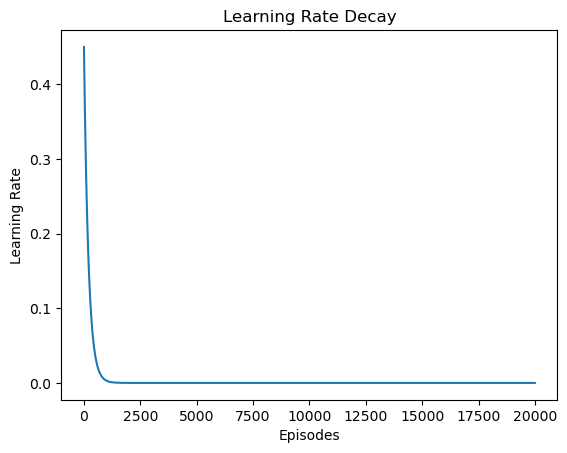

In [32]:
# نمودار نرخ یادگیری
learning_rates = [alpha * (epsilon_decay ** i) for i in range(episodes)]

plt.plot(learning_rates)
plt.xlabel('Episodes')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Decay')
plt.show()
